In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
df = pd.read_csv('/content/drive/MyDrive/df_model.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [26]:
#у lgb регрессора проблема с названиями фичей
new_column_names = [str(i) for i in range(len(df.columns))]
df.columns = new_column_names

обучаю на изначальных фичах, тк это чётко определённые дескрипторы с чётко прослеживаемой зависимостью + их не так много

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,CCN1C2C3OC2C13,0.2855,0.000010,0.599969,0.333022,0.609984,0.463175,0.350947,0.177648,0.000000,...,0.307803,0.514495,0.268527,0.518927,0.630863,0.670641,0.622360,0.125,0.000000,0.469119
1,c1[nH]c2c([nH]nc2n1)N,0.2103,0.000006,0.447144,0.346550,0.074675,0.650453,0.942352,0.401946,0.363185,...,0.543353,0.323933,0.404576,0.518131,0.491241,0.775911,0.622360,0.000,0.000000,0.625986
2,COc1[nH]nc(n1)N,0.2472,0.000008,0.486914,0.318741,0.059659,0.401510,0.492383,0.392679,0.000000,...,0.343931,0.522216,0.467446,0.429901,0.472244,0.700473,0.806687,0.000,0.000000,0.597607
3,CC(C)C(=NO)C(C)C,0.2570,0.000003,0.502211,0.617215,0.072511,0.673320,0.258931,0.195289,0.000000,...,0.705202,0.597436,0.421164,0.510110,0.404019,0.888578,0.622360,0.000,0.000000,0.652924
4,CC1C2CCC1(C)C2O,0.3312,0.000003,0.542527,0.708733,0.590909,0.384972,0.369482,0.191511,0.000000,...,0.826590,0.426853,0.355440,0.393954,0.549024,0.709622,0.622360,0.250,0.000000,0.713075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,CC1C2CC3OCC13O2,0.3006,0.000004,0.461477,0.363783,0.636364,0.413733,0.464001,0.355295,0.179470,...,0.708092,0.557013,0.282280,0.353454,0.566418,0.696554,0.622360,0.250,0.000000,0.591933
19896,CCC(CO)C(=O)C#N,0.1940,0.000003,0.423662,0.796091,0.088745,0.703035,0.372491,0.191511,0.194471,...,0.632948,0.446378,0.481090,0.702108,0.512285,0.642819,0.622360,0.250,0.000000,0.734173
19897,ON=C(CC=O)C1CN1,0.1902,0.000003,0.386288,0.745395,0.221861,0.718342,0.395234,0.574496,0.201423,...,0.541908,0.309094,0.222230,0.569274,0.578301,0.680552,0.622360,0.250,0.166667,0.862340
19898,NC1=NCCC1(N)C#N,0.2371,0.000003,0.481880,0.617666,0.297619,0.699433,0.547870,0.430062,0.186986,...,0.738439,0.424873,0.406394,0.417312,0.480154,0.696554,0.622360,0.250,0.000000,0.779816


In [29]:
X = df.drop(columns=['0', '1'], axis=1)
y = df['1']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGB регрессор

In [31]:
xgbmodel = XGBRegressor()

start_time = time.time()
xgbmodel.fit(X_train, y_train)
train_time_xgb = time.time() - start_time

In [32]:
train_time_xgb

1.7467114925384521

In [43]:
y_pred = xgbmodel.predict(X_test)

xgb_r2 = r2_score(y_test, y_pred)
crossval_xgb_r2_scores = cross_val_score(xgbmodel, X, y, cv=10, scoring='r2')

In [38]:
print(xgb_r2, crossval_xgb_r2_scores, sep='\n')

0.9237743057465134
[0.92355933 0.91231088 0.91845407 0.92453173 0.92367689 0.92367558
 0.91520402 0.91022526 0.91942194 0.92238896]


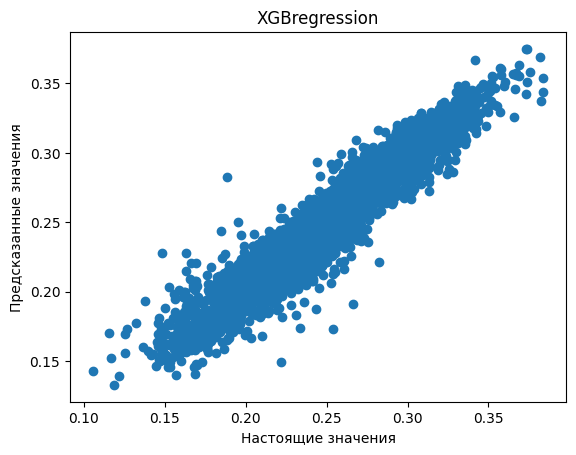

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("XGBregression")
plt.show()

LGB регрессор

In [34]:
lgbmodel = LGBMRegressor(force_col_wise=True)

start_time = time.time()
lgbmodel.fit(X_train, y_train)
train_time_lgb = time.time() - start_time

[LightGBM] [Info] Total Bins 7974
[LightGBM] [Info] Number of data points in the train set: 15920, number of used features: 46
[LightGBM] [Info] Start training from score 0.250232


In [35]:
train_time_lgb

1.3723423480987549

In [39]:
y_pred = lgbmodel.predict(X_test)

lgbm_r2 = r2_score(y_test, y_pred)
crossval_lgbm_r2_scores = cross_val_score(lgbmodel, X, y, cv=10, scoring='r2')

[LightGBM] [Info] Total Bins 8051
[LightGBM] [Info] Number of data points in the train set: 17910, number of used features: 46
[LightGBM] [Info] Start training from score 0.250320
[LightGBM] [Info] Total Bins 8048
[LightGBM] [Info] Number of data points in the train set: 17910, number of used features: 46
[LightGBM] [Info] Start training from score 0.250325
[LightGBM] [Info] Total Bins 8114
[LightGBM] [Info] Number of data points in the train set: 17910, number of used features: 46
[LightGBM] [Info] Start training from score 0.250269
[LightGBM] [Info] Total Bins 8056
[LightGBM] [Info] Number of data points in the train set: 17910, number of used features: 46
[LightGBM] [Info] Start training from score 0.250348
[LightGBM] [Info] Total Bins 8059
[LightGBM] [Info] Number of data points in the train set: 17910, number of used features: 46
[LightGBM] [Info] Start training from score 0.250385
[LightGBM] [Info] Total Bins 8066
[LightGBM] [Info] Number of data points in the train set: 17910, n

In [40]:
print(lgbm_r2, crossval_lgbm_r2_scores, sep='\n')

0.9200432613121841
[0.91615891 0.91250684 0.91228516 0.91356346 0.91809719 0.91822002
 0.91236331 0.90606099 0.91244054 0.92200094]


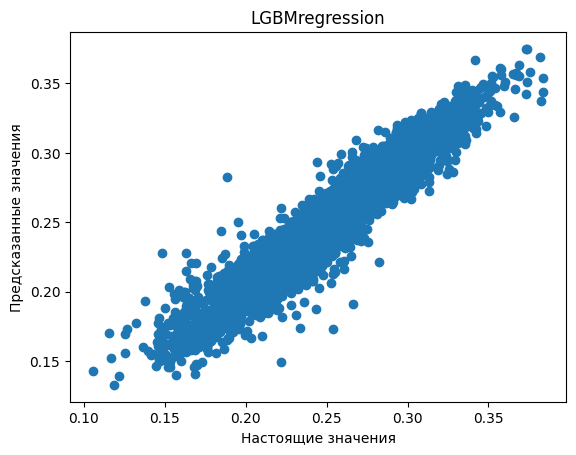

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("LGBMregression")
plt.show()

GradientBoostingRegressor

In [47]:
gbmodel = GradientBoostingRegressor()

start_time = time.time()
gbmodel.fit(X_train, y_train)
train_time_gb = time.time() - start_time

In [48]:
train_time_gb

19.242302894592285

In [49]:
y_pred = gbmodel.predict(X_test)

gb_r2 = r2_score(y_test, y_pred)
crossval_gb_r2_scores = cross_val_score(gbmodel, X, y, cv=10, scoring='r2')

In [50]:
print(gb_r2, crossval_gb_r2_scores, sep='\n')

0.8790578943359767
[0.87119861 0.86576301 0.86905226 0.86972707 0.87787384 0.87263907
 0.87159646 0.86122107 0.86897298 0.88628864]


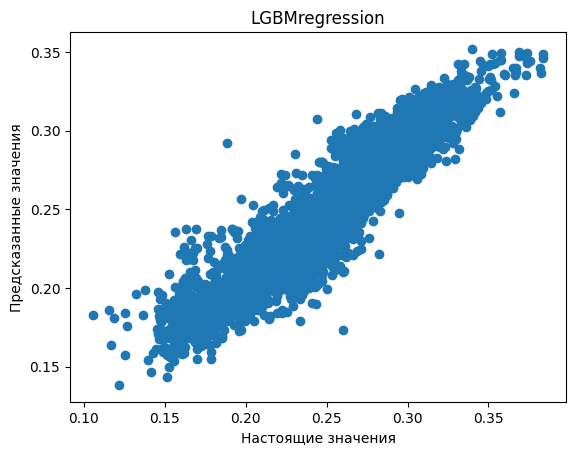

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("LGBMregression")
plt.show()

оптимизирую гиперпараметры для lgbmregressor модели, так как r2 не сильно различается с тем, который у xgb, но есть выигрыш во времени

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid_search_lgbm = GridSearchCV(lgbmodel, param_grid, cv=10, scoring='r2')
grid_search_lgbm.fit(X, y)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

GridSearchCV(cv=10, estimator=LGBMRegressor(force_col_wise=True),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [54]:
print(grid_search_lgbm.best_params_, grid_search_lgbm.best_score_, sep='\n')

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
0.9204414176451555


оптимизация не сильно повлияла на r2